## module import

In [90]:
# !pip install matplotlib
# !pip install seaborn

In [93]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style="white")
plt.rc('font', family='Malgun Gothic') 

## data load

In [15]:
ga = pd.read_csv('../ga_data/train.csv', encoding='CP949')
X_train = ga.copy()

In [74]:
user = pd.read_csv('../ga_data/info_user.csv', encoding='CP949')
competition = pd.read_csv('../ga_data/info_competition.csv', encoding='CP949')
info = pd.read_csv('../ga_data/info_login.csv', encoding='CP949')
submission = pd.read_csv('../ga_data/info_submission.csv', encoding='CP949')

C:\Users\JIIN\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3170: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [75]:
# drop first column
user.drop('Unnamed: 0', axis=1, inplace=True)
info.drop('Unnamed: 0', axis=1, inplace=True)
submission.drop('Unnamed: 0', axis=1, inplace=True)
competition.drop('Unnamed: 0', axis=1, inplace=True)

In [70]:
# # drop NA
# user=user.dropna(how='all').reset_index(drop=True)
# info=info.dropna(how='all').reset_index(drop=True)
# submission=submission.dropna(how='all').reset_index(drop=True)
# competition=competition.dropna(how='all').reset_index(drop=True)

In [71]:
submission.head(2)

,sub_id,cpt_id,team_id,user_id,c_time
0,-250918.0,229255.0,5019.0,15880.0,2019-11-24 20:40
1,-250904.0,229611.0,5162.0,19772.0,2019-11-24 20:36


In [35]:
X_train.columns=list(map(lambda x: x.lower(), X_train.columns))

In [44]:
X_train['datetime'] = pd.to_datetime(X_train['datetime'])
X_train['date'] = X_train['datetime'].dt.date
X_train['year'] = X_train['datetime'].dt.year
X_train['year'] = X_train['datetime'].dt.year
X_train['yearmonth']=X_train['datetime'].dt.strftime('%Y-%m')
X_train['month'] = X_train['datetime'].dt.month
X_train['dayofweek'] = X_train['datetime'].dt.dayofweek
X_train['hour'] = X_train['datetime'].dt.hour

In [45]:
X_train.head()

,datetime,사용자,세션,신규방문자,페이지뷰,year,yearmonth,month,dayofweek,hour,date
0,2018-09-09 00:00:00,19,19,8,206,2018,2018-09,9,6,0,2018-09-09
1,2018-09-09 01:00:00,20,19,9,259,2018,2018-09,9,6,1,2018-09-09
2,2018-09-09 02:00:00,12,9,1,48,2018,2018-09,9,6,2,2018-09-09
3,2018-09-09 03:00:00,10,10,2,102,2018,2018-09,9,6,3,2018-09-09
4,2018-09-09 04:00:00,6,5,3,18,2018,2018-09,9,6,4,2018-09-09


In [99]:
# 결측치 
X_train.isna().sum()

datetime     0
사용자          0
세션           0
신규방문자        0
페이지뷰         0
year         0
yearmonth    0
month        0
dayofweek    0
hour         0
date         0
dtype: int64

In [114]:
print(X_train.shape)
print(X_train.groupby(['date','세션'])['year'].count().sum())

(19008, 11)
19008


- 일자 / 세션별 정보

## EDA
**분석 목적 : 과거의 데이콘 데이터를 활용한 미래의 사용자 행동 패턴을 예측**



<AxesSubplot:>

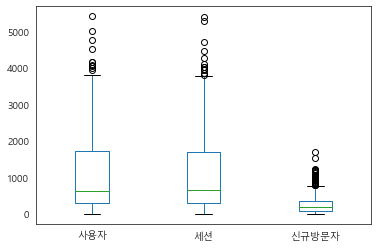

In [113]:
X_train.groupby('date').sum().filter(regex='사용자|세션|신규').plot(kind='box')

C:\Users\JIIN\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JIIN\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


Text(0.5, 1.0, '기본변수 상관계수')

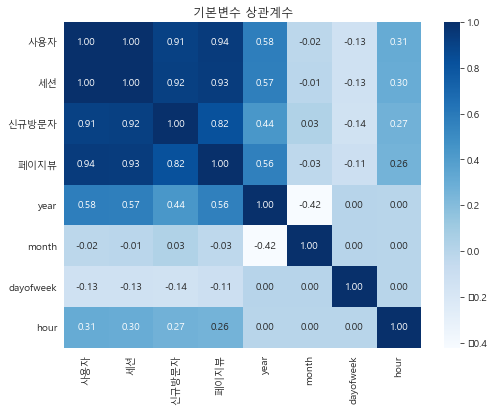

In [112]:
plt.figure(figsize=(8,6))
sns.heatmap(X_train.corr(),
            annot=True, annot_kws={'size':10}, fmt='.2f',
            cmap = "Blues")
plt.title('기본변수 상관계수')

In [63]:
competition.head(2)

,cpt_id,is_official,period_start,period_end,name,name_eng,keyword,keyword_eng,participants,max_team_member,max_file_per_day,prize,prize_info,merge_deadline,winner_show
0,136,1,2018-08-14 0:00,2018-09-13 23:59,대출 상점 총 매출 예측 경진대회,Shop Total Sales Forecast,"금융 | 소상공인 신용카드 가맹점 빅데이터와 AI로 매출 예측 | 시계열, 회귀 ...",[Finance] Small Business Credit Card Merchant ...,303,5,5,850,"$8,500 + 100,000ZPR",2018-09-13 23:59,3
1,9565,1,2018-09-15 0:00,2018-10-13 23:59,병원 개/폐업 분류 예측 경진대회,hospital opening / closing classification pred...,금융 | 병원 재무 데이터와 AI로 개업|폐업 예측 분석 | 분류 | Accuracy,[Financial] Hospital financial data and openin...,448,10,3,350,"$3,500 + 40,000ZPR",2018-10-13 23:59,3


In [115]:
print(f'competition 수 : {competition.cpt_id.nunique()}')
print(competition.shape)

competition 수 : 48
(48, 15)


- 기간내 대회별 정보

In [118]:
print(info.isna().sum())
print(info.shape)

login_id     2429
user_id      9843
c_time       2429
platform    86774
browser     86774
dtype: int64
(151428, 5)


In [128]:
user.dropna(axis=0,inplace=True)
user=user.reset_index(drop=True)

In [ ]:
user.id.nuqn

In [129]:
user.groupby()

,id,c_time,entered_competition_cnt,code_share_cnt,talk_board_cnt,country_code,python_level,ds_level
0,15994.0,2017-05-02 23:58,94.0,306.0,477.0,82.0,1.0,1.0
6854,10018.0,2020-01-02 10:31,73.0,182.0,295.0,1.0,0.0,0.0
6718,11803.0,2019-12-22 13:36,66.0,30.0,106.0,82.0,1.0,0.0
6484,11917.0,2019-12-21 11:03,58.0,64.0,31.0,82.0,0.0,0.0
2528,2369.0,2019-04-08 20:49,56.0,1.0,6.0,82.0,1.0,1.0
...,...,...,...,...,...,...,...,...
15941,2442.0,2020-08-15 18:32,0.0,2.0,0.0,82.0,1.0,1.0
1622,20587.0,2019-02-03 20:17,0.0,0.0,0.0,82.0,1.0,1.0
15939,13173.0,2020-08-15 17:39,0.0,0.0,0.0,82.0,1.0,1.0
3915,14925.0,2019-09-01 15:46,0.0,0.0,0.0,82.0,1.0,1.0


In [121]:
print(user.id.nunique())
print(user.shape)

21692
(22103, 8)


Text(0.5, 1.0, '기본변수 상관계수')

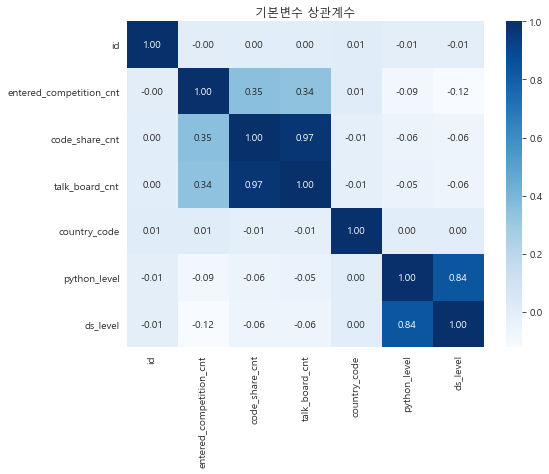

In [132]:
plt.figure(figsize=(8,6))
sns.heatmap(user.corr(),
            annot=True, annot_kws={'size':10}, fmt='.2f',
            cmap = "Blues")
plt.title('기본변수 상관계수')

In [78]:
submission.head()

,sub_id,cpt_id,team_id,user_id,c_time
0,-250918.0,229255.0,5019.0,15880.0,2019-11-24 20:40
1,-250904.0,229611.0,5162.0,19772.0,2019-11-24 20:36
2,-250881.0,235401.0,5042.0,17801.0,2019-11-24 20:24
3,-250873.0,235401.0,5024.0,439.0,2019-11-24 20:23
4,-250860.0,229255.0,4890.0,13722.0,2019-11-24 20:19


In [ ]:
ga_sub = pd.read_csv('../ga_data/submission.csv', encoding='CP949') 
y_

## 데이터 개요

In [8]:
df.head()

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2018-09-09 00:00:00,19,19,8,206
1,2018-09-09 01:00:00,20,19,9,259
2,2018-09-09 02:00:00,12,9,1,48
3,2018-09-09 03:00:00,10,10,2,102
4,2018-09-09 04:00:00,6,5,3,18
